<a href="https://colab.research.google.com/github/DaisyDomergue/ML_speech_base_on_gausian_dist/blob/main/ML_speech_2022_Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning for Speech - **Exercise 1**
**Instructor**: Xuechen Liu (xuecliu@uef.fi)

### Goals of this exercise
* Grab basics of Python and Google Colab
* Learn how to load waveform signal from files in multiple ways using python packages and perform basic analysis
* Have a glance on a representative signal processing step
* Perform simple gender recognition based on F0
---



### Scoring (time given)
* **Prob.1**: 5 points (20 min)
* **Prob.2**: 5 points (40 min)

## Introduction (and how to make submission)

### Programming
Throughout this course we use Python as the main programming language. A gentle introduction of Python 3 can be found at [this link](https://www.tutorialspoint.com/python3/index.htm). For this week's exercise (and probably later weeks'?) students are not required to use advanced methods so one can refresh/learn only basic parts. But of course if you have some programming experience, you will surely be comfortable on refreshing them all.

Apart from basic Python knowledge and more interesting packages and libraries which will be visited later, we heavily rely on:
* Numpy for numerical computation (and minor signal analysis). An intuitive introduction can be found in [this Nature paper](https://www.nature.com/articles/s41586-020-2649-2);
* Matplotlib for visualization.
* PyTorch for basic machine learning related implementations.
* (optional) SpeechBrain for running experiments for most of the given projects.

In case students want to have a more compact tutorial:
* Tutorial on those libraries in a Colab page, from Trung Ngo Trong [link](https://colab.research.google.com/drive/1ISbtr5WV-77uR_ToZyF490SSSMVWQ_Mn?usp=sharing). 
* [Numpy tutorial, from Stanford CS231n](https://colab.research.google.com/github/cs231n/cs231n.github.io/blob/master/python-colab.ipynb?fbclid=IwAR3kZTcxqJnSdB_BIrOH8A0Cv_cVHAOPEZ3MJbMP1EJlGiP4KWRt6TlR0xU)

### How to answer questions - **IMPORTANT**
To answer open-ended questions: _**you simply create empty space under the question and provide your answers!**_ Of course, if you want to do some typesetting, you may need some knowledge on [markdown](https://www.google.com/search?q=markdown+tutorial&oq=markdown+tutorial&aqs=chrome..69i57.2526j0j1&sourceid=chrome&ie=UTF-8) and [latex equations](https://www.overleaf.com/learn/latex/mathematical_expressions). For your reference, this note is written in Markdown.

### How to make submission - **IMPORTANT**
<!-- **File** $\to$ **Download .ipynb** $\to$ _Compress the .ipynb file to PDF and send the PDF to submit it to digicampus, or to instructors' email (as a back-up only)_. -->
You can click **File** $\to$ **print** and choose "save to PDF" according to your operating system. Xuechen have tested and validated such method on MacOS and Ubuntu 20.04.

Note 1: Please re-name the PDF to your name and student number. Any modification/submission after the deadline will be disregarded.

Note 2: Please make sure your answers are included in generated PDF 😂

## Programming exercise 1: Basic I/O and visuals (5 points)
For this week you are asked to familiarize youself with some pythonic audio packages and perform some basic analysis on loaded waveform/signal.

So the very first task would be load waveform. Please run the code below to:
* Download the wav files to your local space
* Install packages we are going to use via a tool called [pip](https://pypi.org/project/pip/). People who use Python should be familiar with this guy (although there are some minor discussion on its potential problems compared with installing directly via source package). For people who does not familiar with Python, it will be very useful for this course to install packages under pythonic environments - this notebook, for example.

---




In [1]:
# Once you execute this block, the files are downloaded and stored temporaily in
# the allocated space. You can click the small folder icon at left-hand side
# to see them.
!wget -nc https://underdogliu.github.io/assets/ml_speech_2022/Im_Superman.wav
!wget -nc https://underdogliu.github.io/assets/ml_speech_2022/Count_Of_Three-8khz.wav

!pip install pysoundfile
!pip install numpy matplotlib 
!pip install librosa
!pip install python_speech_features

import glob
import numpy as np
import librosa
import python_speech_features
import soundfile
import matplotlib.pyplot as plt

import seaborn as sns
from scipy import stats
from librosa import load, note_to_hz, pyin

sns.set()

--2022-03-24 11:55:57--  https://underdogliu.github.io/assets/ml_speech_2022/Im_Superman.wav
Resolving underdogliu.github.io (underdogliu.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to underdogliu.github.io (underdogliu.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 823996 (805K) [audio/wav]
Saving to: ‘Im_Superman.wav’

Im_Superman.wav     100%[===================>] 804.68K  --.-KB/s    in 0.05s   

2022-03-24 11:55:57 (17.3 MB/s) - ‘Im_Superman.wav’ saved [823996/823996]

--2022-03-24 11:55:57--  https://underdogliu.github.io/assets/ml_speech_2022/Count_Of_Three-8khz.wav
Resolving underdogliu.github.io (underdogliu.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to underdogliu.github.io (underdogliu.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50384 (49K) [audio/wav]
Saving to: ‘Count_Of_Three-8khz.wav’

Coun

Next, we need to load the waveform and output the signal:

In [3]:
signal, _ = soundfile.read('Im_Superman.wav')

Hope you just ran the code above without errors. If there is any error, please track te error via colab utilities.

So the very first task is to plot the waveform via matplotlib. Specifically:
1. Plot the waveform loaded from `Im_Superman.wav` using utilities from matplotlib. Plot title is name of wav file.
2. Plot a random segment of signal. Let's say length of segment is 500. Plot title is $name_of_wav_file_500.
3. Repeat the same for `Count_Of_three-8khz.wav`. Can you spot any difference between thoese two wavs? Can the differences be reflected by hearing the wave via your speaker/headphone?

328437


(328437.0, 328937.0)

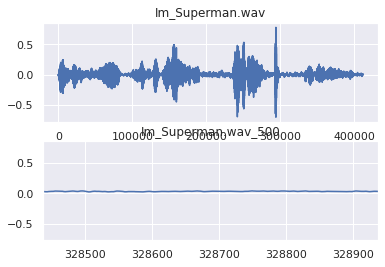

In [53]:
# TODO Code answers to tasks 1-2
import random


ax1=plt.subplot(2,1,1)
plt.title('Im_Superman.wav')
plt.plot(signal)
ax2=plt.subplot(2,1,2)

starting_point = random.randint(0,(signal.size -500))
print(starting_point)
plt.title('Im_Superman.wav_500')
plt.plot(signal)
plt.xlim(starting_point,(starting_point+500))





1973


(1973.0, 2473.0)

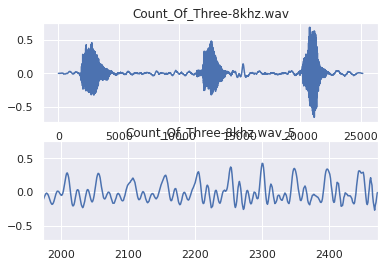

In [50]:
# TODO Code answers to tasks 3

signal_count_of_three, _ = soundfile.read('Count_Of_Three-8khz.wav')
starting_point2 = random.randint(0,(signal_count_of_three.size-500))

ax1=plt.subplot(2,1,1)
plt.title('Count_Of_Three-8khz.wav')
plt.plot(signal_count_of_three)

print(starting_point2)
ax1=plt.subplot(2,1,2)
plt.title('Count_Of_Three-8khz.wav_5')
plt.plot(signal_count_of_three)
plt.xlim(starting_point2,(starting_point2+500))
Audio(signal_count_of_three, rate=sample_rate)

Question: Can you spot any difference between thoese two wavs? Can the differences be reflected by hearing the wave via your speaker/headphone?

there is a significant rest between the counting in the second audio which creates flat section in the signal graph


## Programming exercise 2: Simple gender classification using F0 (5 points)
Hint: Please revise [Tomi's demo code on F0](https://colab.research.google.com/drive/1PxxPN5nVLYw4ormrjZh8W9g1VWHISKwt?usp=sharing) this week for some hints.

In the first week Tomi discussed a probabilistic classifier to predict a person's gender, based on the following assumptions:
1. Two *exhaustive and mutually exclusive* classes, female ($F$) and male ($M$). These are the possible values of our **class label** (denoted by $y$).
2. Flat/uninformative **prior** over the class variable: $P(M)=P(F)=\frac{1}{2}$. This distribution encodes our prior belief on the relative commonality of each of our two classes, before any measurement or speech recording takes place. The prior might present your subjective opinion, hunch, or perhaps an educated guess (e.g. based on prior statistics how often male/female users use a particular service on which you plan to mount the gender detector on). Besides flat prior you may wish to have different prior probabilities --- as long as they are positive and sum up to 1.
3. Our **observation** or **feature**, denoted by $x$, is the fundamental frequency (F0) in a given audio file (for instance, the **average** F0 value of all voiced speech frames). It is a non-negative real number. Here our measuring unit is Hertz (Hz).
4. Our **observation model** for these features $x$ was assumed to be Gaussian (normal distribution). More specifically, we assume that a randomly picked F0 value within a given gender follows a Gaussian distribution.
    
\begin{equation}
p(x|M) = \mathcal{N}(x|\mu_\text{M},\sigma_M^2)=\frac{1}{\sqrt{2\pi}\sigma_M}e^{-\frac{(x-\mu_M)^2}{2\sigma_M^2}}\nonumber
\end{equation}

\begin{equation}
p(x|F) = \mathcal{N}(x|\mu_\text{M},\sigma_F^2)=\frac{1}{\sqrt{2\pi}\sigma_F}e^{-\frac{(x-\mu_F)^2}{2\sigma_F^2}}\nonumber
\end{equation}

Your tasks are as follows.
1. **Parameter estimation based on training set.** In the lectures we used Wikipedia page for an *adhoc*, `pencil and paper' computation of the parameter values (means and variances for gender). Your task is to use **a labeled training dataset** --- pairs of F0 values and their gender labels $\{(x_i, y_i)\}_{i=1}^N$ --- to compute the parameters more objectively. More specifically, your task is to evaluate **sample mean** and **sample variance** for the parameters within each gender. Implement this parameter fitting process based on data provided by the instructors, and graph the resulting two probability density functions in the same figure (e.g. different colors for the genders).

2. **Evaluating the gender detector.** Additionally, your task is to **objectively evaluate** how accurate your gender recognizer is. Keep in mind all the time that in this course we are interested in methods that operate on **unseen data**. In this case it means that you should use <u>different speakers</u> to find the parameter values, and for the evaluation of your classifier. As for the evaluation (on new speakers/new data $x$), simply **predict** the class label using Bayes' rule --- i.e., choosing the `more probable' class: 

\begin{equation}
    \text{Gender}=
    \begin{cases}
      \text{male}, & \text{if}\ P(M|x) > P(F|x) \\
      \text{female}, & \text{if}\ P(M|x) \leq P(F|x)
    \end{cases}
\end{equation}

> This gives you a **prediction** of the gender based on data $x$. This prediction might be correct, or it might be wrong. Please report separately the number of errors in the two possible cases that we have:
* Your classifier says `male` but the actual gender is `female`;
* Your classifier says `female` but the actual gender is `male`.

> You can try with either wav files recorded by yourself or sample wav files from Lauri as presented in his lecture. We provided the downloading and un-reveling code below.


In [54]:
# Task 1: Download the dataset voxceleb_f0.txt
#
# attributes of the file: 
# [SPEAKER_ID GENDER F0_VALUE]
!wget -nc https://underdogliu.github.io/assets/ml_speech_2022/voxceleb_f0.txt

# You can uncomment code below to check if loading is successful
# with open('voxceleb_f0.txt', 'r') as v:
#   for line in v:
#     print(line)

--2022-03-24 12:54:33--  https://underdogliu.github.io/assets/ml_speech_2022/voxceleb_f0.txt
Resolving underdogliu.github.io (underdogliu.github.io)... 185.199.109.153, 185.199.108.153, 185.199.111.153, ...
Connecting to underdogliu.github.io (underdogliu.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22804 (22K) [text/plain]
Saving to: ‘voxceleb_f0.txt’

voxceleb_f0.txt     100%[===================>]  22.27K  --.-KB/s    in 0.001s  

2022-03-24 12:54:34 (17.8 MB/s) - ‘voxceleb_f0.txt’ saved [22804/22804]



In [106]:
# TODO Code answer to Task 1 
# (please run the code block above first)
import numpy as np
import pandas as pd
import scipy
colnames=['ID', 'gender', 'f0'] 
data = pd.read_csv('voxceleb_f0.txt', names=colnames, sep=' ')
mean_array = data.groupby(['gender']).mean()
print("Mean of ",mean_array)
variance_array=data.groupby(['gender']).std()
print("Std of ",variance_array)


Mean of                  f0
gender            
f       201.362660
m       134.197657
Std of                 f0
gender           
f       39.835249
m       32.351627


Question: What is the sample mean and variance for each gender from the training dataset?

Mean            
f       201.362660
m       134.197657

Std            
f       39.835249
m       32.351627


In [84]:
# Task 2: Download and unzip the sample wavs
!wget -nc https://gist.github.com/underdogliu/0f9535e668aa8e44a796297239bffb19/raw/877840f2a20293dc615614084a4e14d77f3fafbb/task2_eval_wavs.zip
!unzip task2_eval_wavs.zip

--2022-03-24 13:23:59--  https://gist.github.com/underdogliu/0f9535e668aa8e44a796297239bffb19/raw/877840f2a20293dc615614084a4e14d77f3fafbb/task2_eval_wavs.zip
Resolving gist.github.com (gist.github.com)... 140.82.113.4
Connecting to gist.github.com (gist.github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gist.githubusercontent.com/underdogliu/0f9535e668aa8e44a796297239bffb19/raw/877840f2a20293dc615614084a4e14d77f3fafbb/task2_eval_wavs.zip [following]
--2022-03-24 13:23:59--  https://gist.githubusercontent.com/underdogliu/0f9535e668aa8e44a796297239bffb19/raw/877840f2a20293dc615614084a4e14d77f3fafbb/task2_eval_wavs.zip
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1151798 (1.1M) [ap

In [107]:
# files are stored in folder 'sample_test_wavs/'.
# You can load files and check signal like below:
signal, _ = soundfile.read('sample_test_wavs/male1.wav')
print(signal) 

[-0.00656128 -0.00576782 -0.00567627 ...  0.00872803  0.00195312
 -0.00244141]


In [108]:
def calc_f0_librosa(wav_file):
  y, sr = load(wav_file, sr=None)
  f0, voiced_flag, voiced_probs = pyin(y,
                                       fmin=note_to_hz('C2'),
                                       fmax=note_to_hz('C7'),
                                       sr=sr)
  f0 = np.nanmean(f0)
  return f0

# TODO Code answer to Task 2
def predict(f0):
  male_prob = scipy.stats.norm(mean_array.iloc[1][0], variance_array.iloc[1][0]).pdf(f0)
  female_prob = scipy.stats.norm(mean_array.iloc[0][0], variance_array.iloc[0][0]).pdf(f0)
  print("For the value of "+ str(f0) +" male_prob "+ str(male_prob) +" female_prob "+ str(female_prob))
  if male_prob>female_prob:
    return "male"
  else:
    return "female"

for i in range(1,4):
  f0 = calc_f0_librosa("sample_test_wavs/male"+str(i)+".wav")
  prediction = predict(f0)
  print(f"Male{i}: f0={f0} predicted: {prediction}")

for i in range(1,3):
  f0 = calc_f0_librosa("sample_test_wavs/female"+str(i)+".wav")
  prediction = predict(f0)
  print(f"Female{i}: f0={f0} predicted: {prediction}")

For the value of 105.6160595055043 male_prob 0.008346943145420978 female_prob 0.000557386051945329
Male1: f0=105.6160595055043 predicted: male
For the value of 113.01734994817689 male_prob 0.009952686496056358 female_prob 0.000856260029672889
Male2: f0=113.01734994817689 predicted: male
For the value of 157.97538386584824 male_prob 0.009412666402964879 female_prob 0.0055340570061919985
Male3: f0=157.97538386584824 predicted: male
For the value of 262.99699468409716 male_prob 4.458458415373535e-06 female_prob 0.0030255792615988923
Female1: f0=262.99699468409716 predicted: female
For the value of 174.47092002907294 male_prob 0.005682058592637301 female_prob 0.007974126761116706
Female2: f0=174.47092002907294 predicted: female


Question: if you misclassified speaker's gender via F0, what do you think can be the reason? Just one speculation shall suffice.

(Answers here)
It is misclassifing I highly suspect he value f0 somewhere in the midrange between the two values so can be confusing for the model to easily identify